In [1]:
"""CUSTOMERS:
customer_id
customer_unique_id
customer_zip_code_prefix
customer_city
customer_state

ORDERS:
order_id
customer_id
order_status
order_purchase_timestamp
order_approved_at
order_delivered_carrier_date
order_delivered_customer_date
order_estimated_d

ORDER_ITEMS:
order_id
order_item_id
product_id
seller_id
shipping_limit_date
price
freight_value

ORDER_PAYMENTS:
order_id
payment_sequential
payment_type
payment_installments
payment_value


PRODUCTS:
product_id
product_category_name
product_name_lenght
product_description_lenght
product_photos_qty
product_weight_g
product_length_cm
product_height_cm
product_width_cm

SELLERS:
seller_id
seller_zip_code_prefix
seller_city
seller_state"""

'CUSTOMERS:\ncustomer_id\ncustomer_unique_id\ncustomer_zip_code_prefix\ncustomer_city\ncustomer_state\n\nORDERS:\norder_id\ncustomer_id\norder_status\norder_purchase_timestamp\norder_approved_at\norder_delivered_carrier_date\norder_delivered_customer_date\norder_estimated_d\n\nORDER_ITEMS:\norder_id\norder_item_id\nproduct_id\nseller_id\nshipping_limit_date\nprice\nfreight_value\n\nORDER_PAYMENTS:\norder_id\npayment_sequential\npayment_type\npayment_installments\npayment_value\n\n\nPRODUCTS:\nproduct_id\nproduct_category_name\nproduct_name_lenght\nproduct_description_lenght\nproduct_photos_qty\nproduct_weight_g\nproduct_length_cm\nproduct_height_cm\nproduct_width_cm\n\nSELLERS:\nseller_id\nseller_zip_code_prefix\nseller_city\nseller_state'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score


customers = pd.read_csv('customers.csv')
orders = pd.read_csv('orders.csv')
order_items = pd.read_csv('order_items.csv')
order_payments = pd.read_csv('order_payments.csv')
products = pd.read_csv('products.csv')
sellers = pd.read_csv('sellers.csv')


In [8]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,Akkarampalle,Andhra Pradesh
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,Akkayapalle,Andhra Pradesh
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,Alwal,Andhra Pradesh


In [9]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018 8:38,8/8/2018 8:55,8/8/2018 13:50,8/17/2018 18:06,9/4/2018 0:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017 19:28,11/18/2017 19:45,11/22/2017 13:39,12/2/2017 0:28,12/15/2017 0:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018 21:18,2/13/2018 22:20,2/14/2018 19:46,2/16/2018 18:17,2/26/2018 0:00


In [10]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,1/18/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,8/15/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2/13/2017 13:57,199.90,18.14


In [11]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
products.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40,287,1,225,16,10,14
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44,276,1,1000,30,18,20
2,96bd76ec8810374ed1b65e291975717f,Sports_Leisure,46,250,1,154,18,9,15
3,cef67bcfe19066a932b7673e239eb23d,Baby,27,261,1,371,26,4,26
4,9dc1a7de274444849c219cff195d0b71,Housewares,37,402,4,625,20,17,13


In [13]:
sellers.head()


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,Badepalle,Andhra Pradesh
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,Akkarampalle,Andhra Pradesh
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,Koratla,Andhra Pradesh


In [14]:
#provera null vrednosti
print(customers.isnull().sum())
print(orders.isnull().sum())
print(order_items.isnull().sum())
print(order_payments.isnull().sum())
print(products.isnull().sum())
print(sellers.isnull().sum())



customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm    

In [15]:
#provera duplikata
print(customers.duplicated().sum())
print(orders.duplicated().sum())
print(order_items.duplicated().sum())
print(order_payments.duplicated().sum())
print(products.duplicated().sum())
print(sellers.duplicated().sum())

0
0
0
0
0
0


In [16]:
# Brisanje null vrednosti
customers.dropna(inplace=True) 
orders.dropna(inplace=True)
order_items.dropna(inplace=True)
order_payments.dropna(inplace=True)
products.dropna(inplace=True)
sellers.dropna(inplace=True)


In [17]:
#provera null vrednosti
print(customers.isnull().sum())
print(orders.isnull().sum())
print(order_items.isnull().sum())
print(order_payments.isnull().sum())
print(products.isnull().sum())
print(sellers.isnull().sum())

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm    

In [18]:
print(customers.dtypes)
print(orders.dtypes)
print(order_items.dtypes)
print(order_payments.dtypes)
print(products.dtypes)
print(sellers.dtypes)

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments      int64
payment_value           float64
dtype: object
product_id                    object
product_category_name         objec

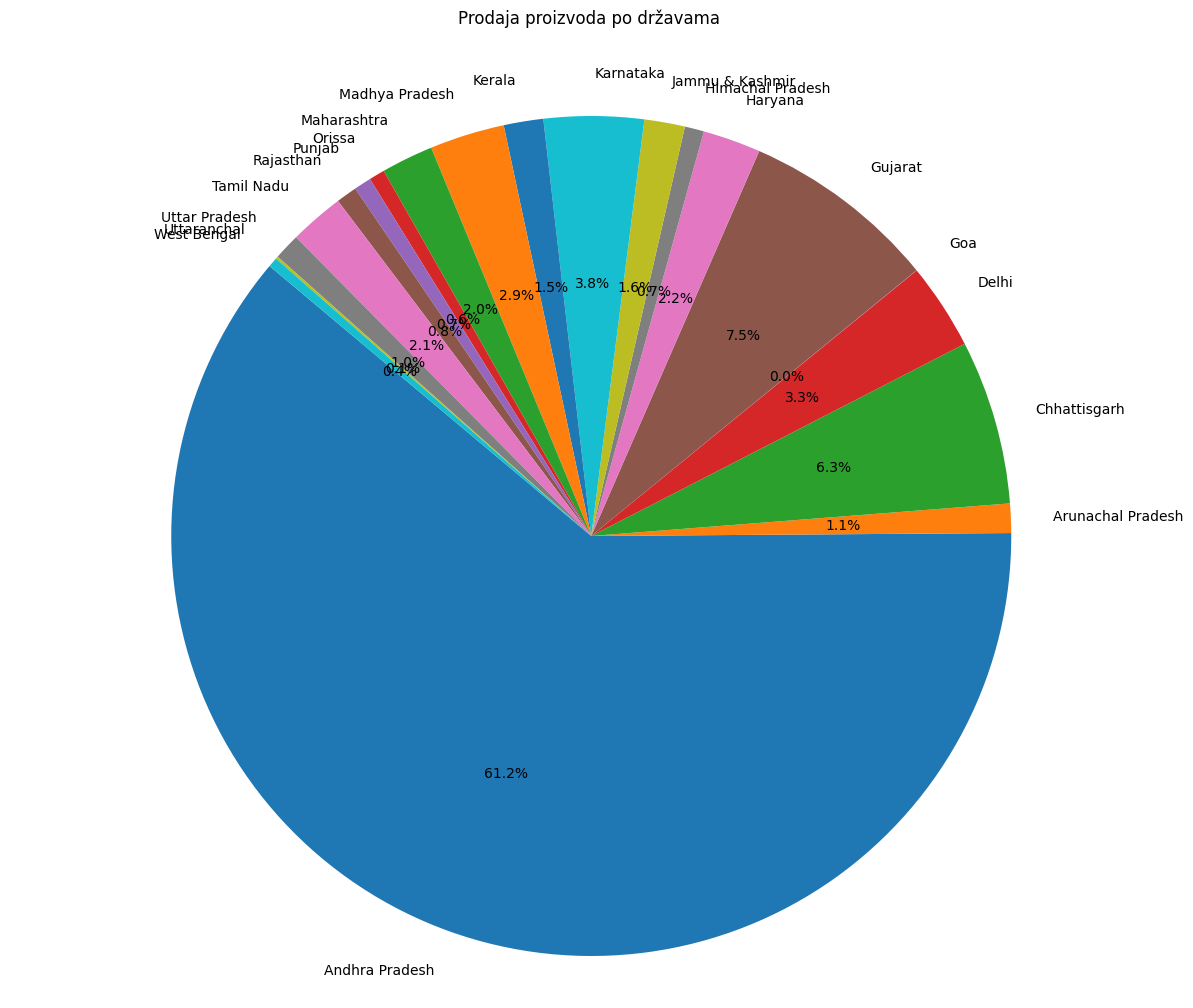

In [47]:
# Izračunavanje sume količine proizvoda po narudžbinama
quantity_by_order = order_items.groupby('order_id')['order_item_id'].count().reset_index()

# Spajanje tabela 'orders', 'quantity_by_order' i 'customers'
merged_data = pd.merge(pd.merge(orders, quantity_by_order, on='order_id', how='inner'), customers, on='customer_id', how='inner')

# Izračunavanje sume količine proizvoda po državama kupaca
quantity_by_state = merged_data.groupby('customer_state')['order_item_id'].sum().reset_index()


# Kreiranje pie chart-a
plt.figure(figsize=(15, 12))
plt.pie(quantity_by_state['order_item_id'], labels=quantity_by_state['customer_state'], autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Prodaja proizvoda po državama \n\n')
plt.show()



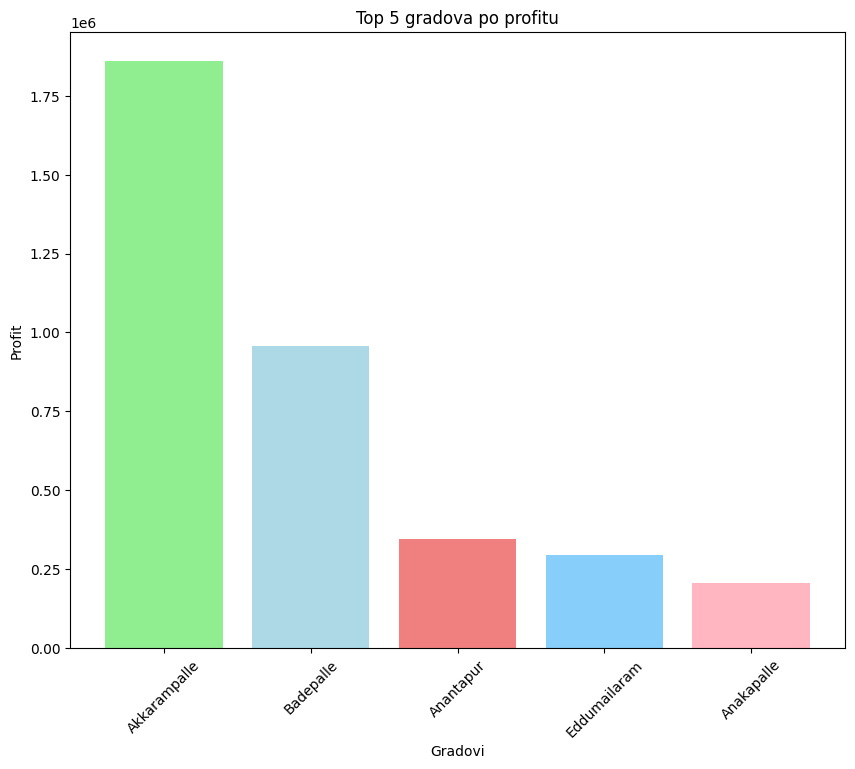

In [76]:
merged_orders_customers = pd.merge(orders, customers, on='customer_id')

# Spajanje dobijene tabele sa tabelom order_items na osnovu order_id
merged_data = pd.merge(merged_orders_customers, order_items, on='order_id')

# Agregacija profita po gradu
profitPoGradu = merged_data.groupby('customer_city')['price'].sum().reset_index()

# Sortiranje po profitu i izdvajanje top 5 gradova
topGradovi = profitPoGradu.sort_values(by='price', ascending=False).head(5)


imeGrad = topGradovi['customer_city'].tolist()
profitGrad = topGradovi['price'].tolist()


plt.figure(figsize=(10, 8))
plt.bar(imeGrad, profitGrad, color=['lightgreen', 'lightblue', 'lightcoral', 'lightskyblue', 'lightpink'])
plt.xlabel('Gradovi')
plt.ylabel('Profit')
plt.title('Top 5 gradova po profitu')
plt.xticks(rotation=45)
plt.show()

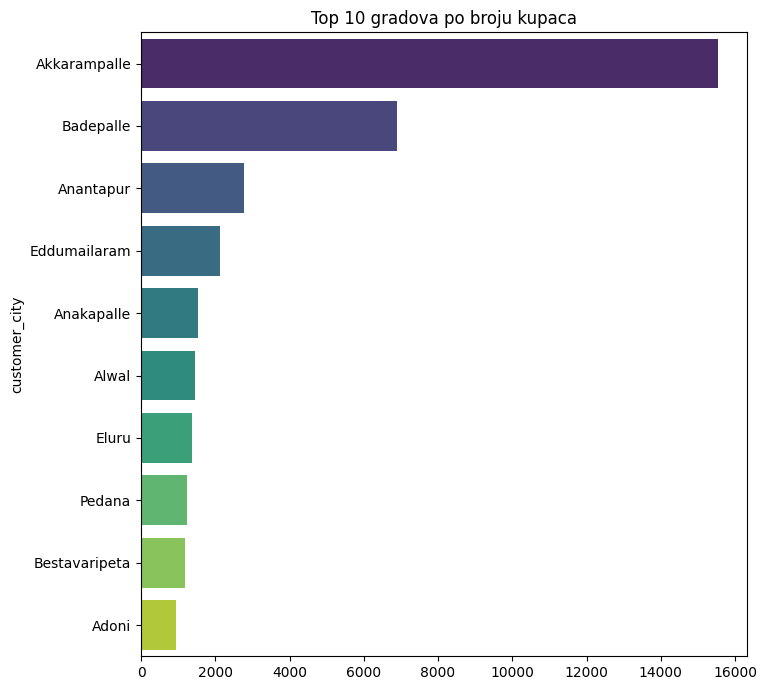

In [75]:
# Broj kupaca po gradu
brojKupaca = customers['customer_city'].value_counts().sort_values(ascending=False)

# Top 10 gradova
Gradovi = brojKupaca.head(10)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.barplot(x=Gradovi.values, y=Gradovi.index, palette="viridis", hue=Gradovi.index, legend=False)
plt.title('Top 10 gradova po broju kupaca')

plt.tight_layout()
plt.show()


In [2]:
products_data = pd.read_csv('products.csv')
items_data = pd.read_csv('order_items.csv')
merge_data = pd.merge(products_data,items_data, on ='product_id')


In [4]:
# Kolone za regresiju
product_features = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

X = merge_data[product_features]
y = merge_data['freight_value']

In [5]:
# Podela podataka na trening i test setove
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Treniranje modela 
freight_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)
freight_regressor.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=5, random_state=42)

In [6]:
# Predikcija na test setu
predictions = freight_regressor.predict(X_test)
print(y_test[:15])
print(predictions[:15])
accuracy = freight_regressor.score(X_test, y_test)
print("Tačnost modela:", accuracy)



56720     7.39
55141    27.69
53388    13.93
97887    10.01
79580    22.37
4813     36.93
45796    12.79
43500    12.83
36218     8.27
19164    13.08
42265    15.52
12808    20.40
2372     15.89
60621    24.07
51685    19.48
Name: freight_value, dtype: float64
[14.87255533 16.26360424 18.64236325 17.52265032 23.68522791 30.12872087
 14.87255533 17.52265032 14.87255533 20.71603012 18.64236325 16.26360424
 16.26360424 30.12872087 23.68522791]
Tačnost modela: 0.4270572128660981


In [8]:
freight_regressor2 = DecisionTreeRegressor(min_samples_leaf=3, random_state=0)
freight_regressor2.fit(X_train, y_train)


DecisionTreeRegressor(min_samples_leaf=3, random_state=0)

In [9]:
# Predikcija na test setu
predictions2 = freight_regressor2.predict(X_test)
print(y_test[:15])
print(predictions2[:15])
accuracy2 = freight_regressor2.score(X_test, y_test)
print("Tačnost modela:", accuracy2)

56720     7.39
55141    27.69
53388    13.93
97887    10.01
79580    22.37
4813     36.93
45796    12.79
43500    12.83
36218     8.27
19164    13.08
42265    15.52
12808    20.40
2372     15.89
60621    24.07
51685    19.48
Name: freight_value, dtype: float64
[ 9.2        14.29529412 21.16       33.068      41.635      19.505
 14.8703876  14.56262295 10.73714286 17.4275     24.99666667 27.778
  7.15809756 19.45       15.47333333]
Tačnost modela: 0.44971832692898506
